In [2]:
import pandas as pd
import glob

In [3]:
# 데이터 불러오기
ws = pd.read_csv('../data/combined_data.csv')

# 데이터 확인
ws.head()

,No,UserCode,Heartbeat,Temperature,Spo2,GyroX,GyroY,GyroZ,VitalDate
0,1,1,61,36.6,98.0,-0.15,9.15,-0.34,14:48:49
1,2,1,70,37.0,97.0,0.11,9.19,2.76,14:49:38
2,3,1,64,37.2,96.0,-4.06,7.40,4.02,14:50:27
3,4,1,65,37.4,95.0,-2.87,7.93,3.21,14:51:16
4,5,1,62,37.4,95.0,-0.19,10.04,4.82,14:52:05


In [4]:
import pandas as pd

columns = ['Heartbeat', 'Temperature', 'GyroX', 'GyroY', 'GyroZ']
wsDF = pd.DataFrame[ws, columns=columns]

# 클러스터링 수행
kmeans = KMeans(n_clusters=3, random_state=0, n_init=100)
clusters = kmeans.fit_predict(data)

# 클러스터링 결과 출력
print(clusters)

SyntaxError: invalid syntax. Maybe you meant '==' or ':=' instead of '='? (4077816013.py, line 5)

In [17]:
from sklearn.preprocessing import StandardScaler

# StandardScaler 객체를 생성
scaler = StandardScaler()

# 데이터를 표준화
scaled_data = scaler.fit_transform(df)

In [35]:
X = df

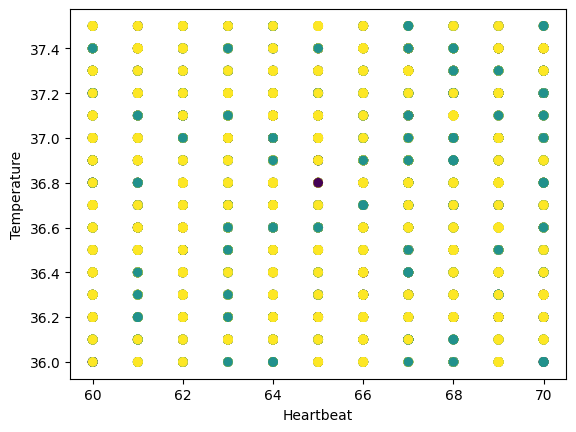

In [37]:
import matplotlib.pyplot as plt

# 산점도 시각화
plt.scatter(data['Heartbeat'], data['Temperature'], c=clusters, cmap='viridis')
plt.xlabel('Heartbeat')
plt.ylabel('Temperature')
plt.show()

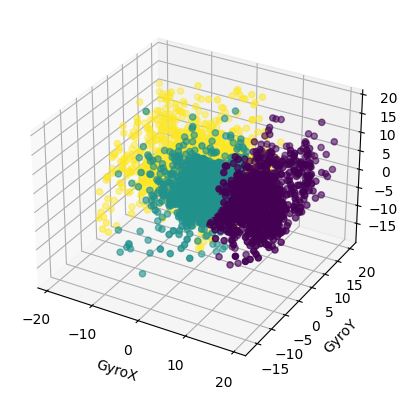

In [38]:
import matplotlib.pyplot as plt

# 산점도 시각화 (3D)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(data['GyroX'], data['GyroY'], data['GyroZ'], c=clusters, cmap='viridis')
ax.set_xlabel('GyroX')
ax.set_ylabel('GyroY')
ax.set_zlabel('GyroZ')
plt.show()

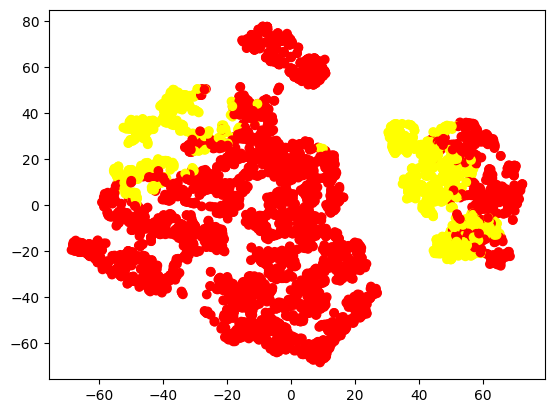

In [39]:
from sklearn.manifold import TSNE

# t-SNE를 사용하여 2차원으로 축소된 데이터 포인트의 좌표 계산
X_tsne = TSNE(n_components=2, random_state=0).fit_transform(X)

# 산점도를 그리고 데이터 포인트를 시각화
# 각 데이터 포인트의 x 좌표는 X_tsne[:, 0]에서 가져오고, y 좌표는 X_tsne[:, 1]에서 가져옴
# clusters 라벨에 따라 데이터 포인트의 색상을 지정하여 시각화
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=['yellow' if label == 0 else 'red' for label in clusters])
plt.show()

In [40]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)

pca.fit(X)
ws_pca = pca.transform(X)
print(ws_pca.shape)

(4800, 2)


In [41]:
pca_columns=['pca_columns_1','pca_columns_2']
wsDF_pca = pd.DataFrame(ws_pca, columns=pca_columns)
wsDF_pca['target'] = X.target
wsDF_pca.head()

AttributeError: 'DataFrame' object has no attribute 'target'